<a href="https://colab.research.google.com/github/Samiya2002/Abnormal-Traffic-Detection-in-Network-using-Double-Deep-Q-Networking-Algorithm/blob/main/MajorProject_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import random
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('/content/KDDTrain+.txt')
test_df = pd.read_csv('/content/KDDTest+.txt')

In [ ]:
train_df.drop('20',axis=1,inplace=True)
test_df.drop('21',axis=1,inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [ ]:
train_df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
import pandas as pd

# Define the attribute names
columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'class'
]

# Assign the attribute names to the DataFrame columns
train_df.columns = columns
test_df.columns=columns

In [ ]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Replace non-normal classes with 'anomaly' in train_df
train_df.loc[train_df['class'] != 'normal', 'class'] = 'anomaly'

# Replace non-normal classes with 'anomaly' in test_df
test_df.loc[test_df['class'] != 'normal', 'class'] = 'anomaly'

# Verify the changes
print(train_df['class'].unique())
print(test_df['class'].unique())

['normal' 'anomaly']
['anomaly' 'normal']


In [ ]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = train_df.columns.difference(categorical_features + ['class'])

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separate features (states) and labels (actions) for training data
X_train = train_df.drop('class', axis=1)  # Features (states)
y_train = train_df['class']  # Labels (actions)

# Apply preprocessing to training features
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Separate features (states) and labels (actions) for testing data
X_test = test_df.drop('class', axis=1)  # Features (states)
y_test = test_df['class']  # Labels (actions)

# Apply preprocessing to testing features
X_test_preprocessed = preprocessor.transform(X_test)

# Create new DataFrames with preprocessed features
columns = numerical_features.tolist() + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=columns)

# Display the preprocessed DataFrames
print("Preprocessed Training Data:")
print(X_train_preprocessed_df.head())

print("\nPreprocessed Testing Data:")
print(X_test_preprocessed_df.head())

Preprocessed Training Data:
      count  diff_srv_rate  dst_bytes  dst_host_count  dst_host_diff_srv_rate  \
0 -0.620987       0.482196  -0.004919        0.734337                2.736839   
1  0.339641       0.038526  -0.004919        0.734337               -0.174419   
2 -0.690851      -0.349685  -0.002891       -1.533667               -0.439079   
3 -0.472526      -0.349685  -0.004814        0.734337               -0.439079   
4  0.322176      -0.016932  -0.004919        0.734337               -0.068555   

   dst_host_rerror_rate  dst_host_same_src_port_rate  dst_host_same_srv_rate  \
0             -0.387635                     2.367729               -1.161035   
1             -0.387635                    -0.480194               -0.938292   
2             -0.387635                    -0.383106                1.066393   
3             -0.387635                    -0.480194                1.066393   
4              2.874397                    -0.480194               -1.005115   

   d

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import random

# Define Autoencoder architecture
def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(64, activation='relu')(input_layer)
    encoder = Dense(16, activation='relu')(encoder)

    decoder = Dense(64, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Define DNN architecture
def build_dnn(input_dim, output_dim,learning_rate=0.0001):
    model = tf.keras.Sequential([
        Dense(100, activation='relu', input_shape=(input_dim,)),
        Dense(output_dim, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# SSDDQN Algorithm
def ssddqn_algorithm(Q_model, autoencoder, X, kmeans, epsilon=1.0, gamma=0.01, M=1000, k=100, T=200):
    for episode in range(T):
        state = X[np.random.randint(0, len(X))]
        Q_values = Q_model.predict(state.reshape(1, -1))
        if np.random.rand() < epsilon:
            action = np.argmax(Q_values)
        else:
            action = np.random.randint(0, len(Q_values[0]))
        next_state = X[np.random.randint(0, len(X))]
        next_state = np.ascontiguousarray(next_state, dtype=np.double)

        distances = np.linalg.norm(next_state - kmeans.cluster_centers_, axis=1)
        predicted_cluster = np.argmin(distances)
        reward = 1 if action == predicted_cluster else 0
        transition = (state, action, reward, next_state)
        replay_memory.append(transition)
        batch_size = min(k, len(replay_memory))
        batch = np.array(random.sample(replay_memory, batch_size), dtype=object)
        Q_target = Q_model.predict(np.vstack(batch[:, 3]))
        Q_target[np.arange(Q_target.shape[0]), batch[:, 1].astype(int)] = reward + gamma * np.max(Q_target, axis=1)
        Q_model.train_on_batch(np.vstack(batch[:, 0]), Q_target)
        epsilon = max(0.01, epsilon * 0.995)

X_train = np.ascontiguousarray(X_train_preprocessed_df.values, dtype=np.double)

# Encode categorical labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Build and train Autoencoder
autoencoder = build_autoencoder(X_train.shape[1], 16)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True)

# Get encoded features
encoded_features = autoencoder.predict(X_train)

# Use KMeans to cluster encoded features
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(encoded_features)

# Build and train DNN
dnn_model = build_dnn(encoded_features.shape[1], 2)
dnn_model.fit(encoded_features, tf.keras.utils.to_categorical(y_train_encoded, 2), epochs=10, batch_size=32, shuffle=True)

# Initialize Q-network
Q_model = build_dnn(encoded_features.shape[1], 2)

# Initialize replay memory
replay_memory = []

# Run SSDDQN algorithm
ssddqn_algorithm(Q_model, autoencoder, X_train, kmeans)


Epoch 1/10
3937/3937 [==============================] - 10s 2ms/step - loss: 0.2273
Epoch 2/10
3937/3937 [==============================] - 8s 2ms/step - loss: 0.2195
Epoch 3/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.2187
Epoch 4/10
3937/3937 [==============================] - 8s 2ms/step - loss: 0.2184
Epoch 5/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.2180
Epoch 6/10
3937/3937 [==============================] - 17s 4ms/step - loss: 0.2166
Epoch 7/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.2165
Epoch 8/10
3937/3937 [==============================] - 8s 2ms/step - loss: 0.2162
Epoch 9/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.2162
Epoch 10/10
3937/3937 [==============================] - 6s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.0516 - accuracy: 0.9825
Epoch 2/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.0287 - accuracy: 0.9897
Epoch 3/10
3937/3937 [==============================] - 7s 2ms/step - loss: 0.0257 - accuracy: 0.9906
Epoch 4/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.0240 - accuracy: 0.9909
Epoch 5/10
3937/3937 [==============================] - 8s 2ms/step - loss: 0.0229 - accuracy: 0.9913
Epoch 6/10
3937/3937 [==============================] - 10s 2ms/step - loss: 0.0222 - accuracy: 0.9915
Epoch 7/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.0217 - accuracy: 0.9917
Epoch 8/10
3937/3937 [==============================] - 8s 2ms/step - loss: 0.0214 - accuracy: 0.9918
Epoch 9/10
3937/3937 [==============================] - 9s 2ms/step - loss: 0.0208 - accuracy: 0.9921
Epoch 10/10
4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Encode categorical labels to integers for the test dataset
y_test_encoded = label_encoder.transform(y_test)

# Preprocess the test features
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed = np.ascontiguousarray(X_test_preprocessed, dtype=np.double)

# Get encoded features for the test dataset
encoded_features_test = autoencoder.predict(X_test_preprocessed)

# Use KMeans to predict clusters for the encoded features of the test dataset
predicted_clusters_test = kmeans.predict(encoded_features_test)

# Use the DNN model to predict the final output for the test dataset
final_output_test = dnn_model.predict(encoded_features_test)

# Convert the final output to binary predictions (0 or 1)
binary_predictions_test = np.argmax(final_output_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, binary_predictions_test)
precision = precision_score(y_test_encoded, binary_predictions_test)
recall = recall_score(y_test_encoded, binary_predictions_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, binary_predictions_test)

# Extract true positive (TP), false positive (FP), true negative (TN), false negative (FN) from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Calculate Efficiency
efficiency = TPR - FPR

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")
print(f"Efficiency: {efficiency}")

705/705 [==============================] - 2s 3ms/step
Accuracy: 0.8112939715210931
Precision: 0.7065011730871111
Recall: 0.9612810215219854
True Positive Rate (TPR): 0.9612810215219854
False Positive Rate (FPR): 0.302213216957606
Efficiency: 0.6590678045643794


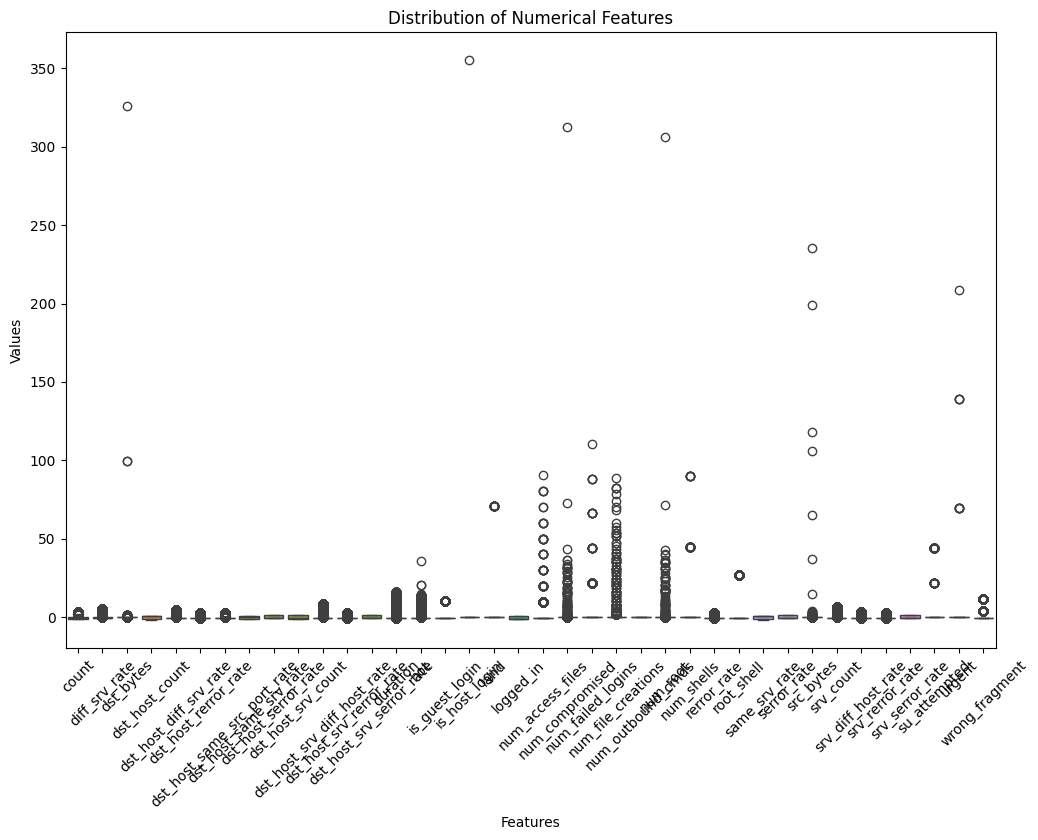

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_preprocessed_df[numerical_features])
plt.title('Distribution of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

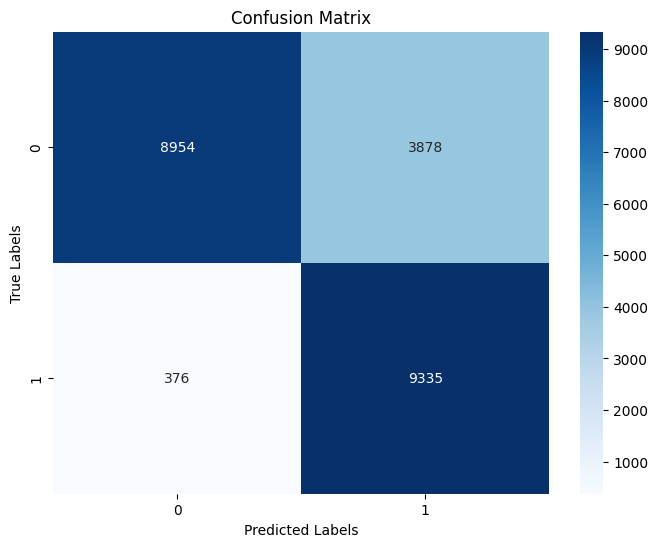

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print(y_test_encoded)

[0 1 0 ... 0 1 0]


In [ ]:
for x in y_test_encoded:
    print(x,end=' ')

0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 

In [ ]:
for x in binary_predictions_test:
    print(x,end=' ')

0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 

In [ ]:
!jupyter nbconvert --to html "MajorProject_phase2.ipynb"

[NbConvertApp] Converting notebook MajorProject_phase2.ipynb to html
[NbConvertApp] Writing 816365 bytes to MajorProject_phase2.html
